# Darstellung der Ergebnisse der Klassifizierung in Karten

In diesem Jupyter Notebook wurden die Klassifizierungen in Karten dargestellt.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from matplotlib.colors import ListedColormap

In [20]:
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_43_45_bis_51/merkmaleMitLabelnFuzzyVersuch6.csv")

In [9]:
featuresDf['Klasse'].value_counts()

1    63909
0    39591
2    12290
Name: Klasse, dtype: int64

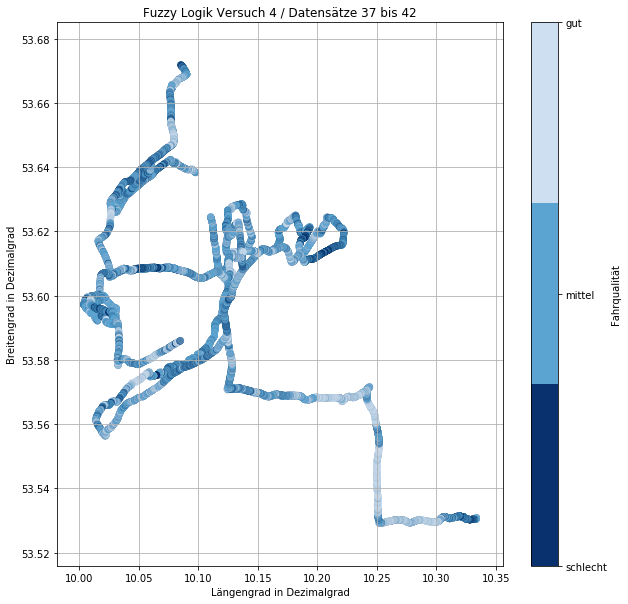

In [11]:
plt.figure(figsize=(10,10))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Fuzzy Logik Versuch 4 / Datensätze 37 bis 42')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[2, 1, 0]) 
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht', 'mittel', 'gut']) 
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.grid()
plt.savefig("karteFuzzyVersuch4_datensatz37_bis_42.png")

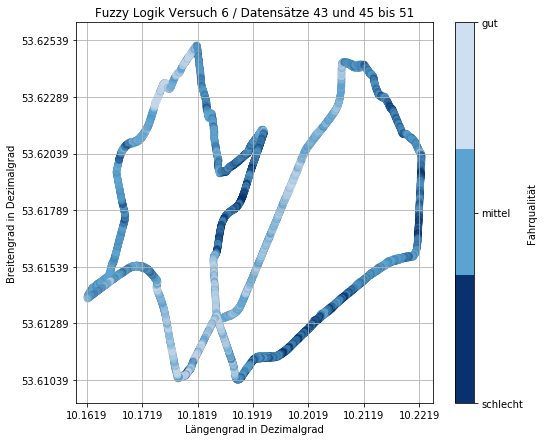

In [21]:
plt.figure(figsize=(8,7))
cmapD = ListedColormap(['#cddff1','#5ba3d0','#08316d'])
plt.title('Fuzzy Logik Versuch 6 / Datensätze 43 und 45 bis 51')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[2, 1, 0]) 
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht', 'mittel', 'gut']) 
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.axis([featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002,featuresDf['Breitengrad'].min()-0.001,featuresDf['Breitengrad'].max()+0.001])
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.01))
plt.yticks(np.arange(featuresDf['Breitengrad'].min(),featuresDf['Breitengrad'].max()+0.002,0.0025))
plt.grid()
plt.savefig("karteFuzzyVersuch6_datensatz43_45_bis_51.png")

In [15]:
featuresDf = featuresDf[featuresDf['Klasse'] != 1]
i = 0
while i < featuresDf.shape[0]:
    labelNr = featuresDf['Klasse'].iloc[i]
    if labelNr == 2:
        featuresDf.iat[i,29] = 1
    i = i + 1

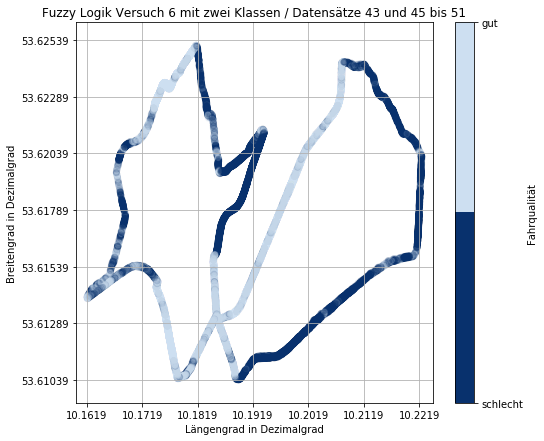

In [18]:
plt.figure(figsize=(8,7))
cmapD = ListedColormap(['#cddff1','#08316d'])
plt.title('Fuzzy Logik Versuch 6 mit zwei Klassen / Datensätze 43 und 45 bis 51')
sca = plt.scatter(featuresDf['Laengengrad'], featuresDf['Breitengrad'], c=featuresDf['Klasse'], cmap=cmapD, alpha=0.1)
cbar = plt.colorbar(sca,ticks=[1, 0])
cbar.set_label("Fahrqualität")
cbar.set_alpha(1)
cbar.draw_all()
cbar.ax.invert_yaxis()
cbar.ax.set_yticklabels(['schlecht','gut'])
plt.xlabel('Längengrad in Dezimalgrad')
plt.ylabel('Breitengrad in Dezimalgrad')
plt.axis([featuresDf['Laengengrad'].min()-0.002,featuresDf['Laengengrad'].max()+0.002,featuresDf['Breitengrad'].min()-0.001,featuresDf['Breitengrad'].max()+0.001])
plt.xticks(np.arange(featuresDf['Laengengrad'].min(),featuresDf['Laengengrad'].max(),0.01))
plt.yticks(np.arange(featuresDf['Breitengrad'].min(),featuresDf['Breitengrad'].max()+0.002,0.0025))
plt.grid()
plt.savefig("karteFuzzyVersuch6_2Klassen_datensatz43_45_bis_51.png")

In [26]:
featuresDf['Laengengrad'].min()

10.161906

## OpenStreetMap Route Generator

Mit den folgenden Zellen ist es möglich zu einem erfassten Datensatz eine Route in OpenStreetMap (OSM) zu erstellen. Als API wurde die OSM Test API genutzt. Der Aufruf der OSM API und Bearbeitung erfolgte mit den OSM Python wrapper [osmapi](https://github.com/metaodi/osmapi).

In [4]:
from osmapi import OsmApi
from haversine import haversine

In [43]:
MyApi = OsmApi(api="https://api06.dev.openstreetmap.org", username = u"morro34@hotmail.de", password = u"pPoXrh6DVPXpcs8drFIi")

In [44]:
MyApi.ChangesetCreate({u"test": u"My first test"})

126637

In [6]:
featuresDf = pandas.read_csv("../daten/merkmale_datensatz_43_45_bis_51/merkmaleMitLabelnFuzzyVersuch6.csv")

In [9]:
haversine([featuresDf['Breitengrad'].iloc[0],featuresDf['Laengengrad'].iloc[0]], [featuresDf['Breitengrad'].iloc[2],featuresDf['Laengengrad'].iloc[2]]) * 1000

2.383498981571627

In [22]:
featuresDf = featuresDf[:8000]

In [45]:
maxLength = len(featuresDf) - 1
i = 0
maxMeter = 1000
sumMeter = 0
listNodes = []
listNodes.append(MyApi.NodeCreate({u"lon":featuresDf['Laengengrad'].iloc[i], u"lat":featuresDf['Breitengrad'].iloc[i], u"tag": {}}).get('id'))
while i < maxLength:
    sumMeter = sumMeter + haversine([featuresDf['Laengengrad'].iloc[i],featuresDf['Breitengrad'].iloc[i]], [featuresDf['Laengengrad'].iloc[i+1],featuresDf['Breitengrad'].iloc[i+1]]) * 1000
    if sumMeter > maxMeter:
        print(sumMeter)
        sumMeter = 0
        listNodes.append(MyApi.NodeCreate({u"lon":featuresDf['Laengengrad'].iloc[i], u"lat":featuresDf['Breitengrad'].iloc[i], u"tag": {}}).get('id'))
    i = i + 1

1000.6898020339036
1001.8881593957924
1002.3816538695575
1005.6799842750264
1000.0266165124026
1000.5734698270195
1006.8210898942499
1006.342411866164
1004.4326151374753
1002.2340214397045
1001.0051304405208
1002.6384935515158
1008.2608118834281
1000.858144533897
1002.907968252635
1004.5728865118796


In [26]:
len(featuresDf)

8000

In [31]:
listNodes

[4308893215,
 4308893216,
 4308893217,
 4308893218,
 4308893219,
 4308893220,
 4308893221,
 4308893222,
 4308893223,
 4308893224,
 4308893225,
 4308893226]

In [46]:
MyApi.WayCreate(
{   'nd': listNodes,
    'tag': {} 
})

{'changeset': 126637,
 'id': 4305047536,
 'nd': [4308893227,
  4308893228,
  4308893229,
  4308893230,
  4308893231,
  4308893232,
  4308893233,
  4308893234,
  4308893235,
  4308893236,
  4308893237,
  4308893238,
  4308893239,
  4308893240,
  4308893241,
  4308893242,
  4308893243],
 'tag': {},
 'version': 1}

In [35]:
way = MyApi.WayGet(4305047535)

In [36]:
MyApi.WayDelete(way)

{'changeset': 126636,
 'id': 4305047535,
 'nd': [4308893215,
  4308893216,
  4308893217,
  4308893218,
  4308893219,
  4308893220,
  4308893221,
  4308893222,
  4308893223,
  4308893224,
  4308893225,
  4308893226],
 'tag': {},
 'uid': 6764,
 'user': 'SandGreif',
 'version': 2,
 'visible': False}

In [41]:
for node in listNodes:
    MyApi.NodeDelete(MyApi.NodeGet(node))

In [42]:
MyApi.flush()